In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.4
pandas version :  1.2.3
seaborn version :  0.11.2


In [38]:
df = pd.read_csv('dataset.csv')
df

Administrative  Administrative_Duration  Informational  \
0                 0.0                 0.000000              0   
1                 0.0                 0.000000              0   
2                 0.0                 0.000000              0   
3                 0.0                      NaN              0   
4                 0.0                 0.000000              0   
...               ...                      ...            ...   
12941             0.0                 0.000000              0   
12942             0.0                 0.000000              0   
12943            14.0               484.461579              2   
12944             3.0                60.833333              0   
12945             0.0                 0.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12941                     0.0               2                 0.000000   
12942                     0.0              59              1309.658333   
12943                    14.0              33               898.491579   
12944                     0.0              18               884.633333   
12945                     0.0               6               241.000000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000         0.0         0.0   Feb               1.0   
1         0.000000   0.100000         0.0         0.0   Feb               2.0   
2         0.200000   0.200000         0.0         0.0   Feb               4.0   
3         0.050000   0.140000         0.0         0.0   Feb               3.0   
4         0.020000   0.050000         0.0         0.0   Feb               3.0   
...            ...        ...         ...         ...   ...               ...   
12941     0.200000   0.200000         0.0         0.0   Nov               3.0   
12942     0.017241   0.030879         0.0         0.0   Dec               3.0   
12943     0.004269   0.034661         0.0         0.0   Sep               1.0   
12944     0.021053   0.041140         0.0         0.0   Mar               2.0   
12945     0.000000   0.033333         0.0         0.0   May               2.0   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12941        2       1           13  Returning_Visitor    False    False  
12942        2       3            1  Returning_Visitor    False    False  
12943        8       1            3  Returning_Visitor    False    False  
12944        2       3           10  Returning_Visitor    False    False  
12945       10       2            3  Returning_Visitor    False    False  

[12946 rows x 18 columns]

# Descriptive Analysis

### 1. Tuliskan hasil observasi.  
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?  
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?  
C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [8]:
kategori = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
numerikal = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',  
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
date = ['Month']

data dibagi menjadi 3 tipe, yaitu kategori, numerik, dan date

Terdapat beberapa tipe data yang kurang sesuai, seperti Region, traffictype, browser, operating system yang harusnya bertipe data object. Bisa diganti tipe datanya saat praproses data.

In [9]:
df[kategori].astype('object').describe()

OperatingSystems  Browser  Region  TrafficType        VisitorType  \
count            12422.0    12946   12946        12946              12946   
unique               8.0       13       9           20                  3   
top                  2.0        2       1            2  Returning_Visitor   
freq              6673.0     8360    5031         4100              11072   

       Weekend Revenue  
count    12946   12946  
unique       2       2  
top      False   False  
freq      9929   10938

Data seperti operating system, browser, region, dan traffic type memiliki label yang kurang jelas. Bisa ditambahkan penjelasan label tersebut.  
  
- OperatingSystem : Windows, Linux,  Chrome Os, MAC OS, iOS, Android
- Browser : Google Chrome, Microsoft Edge, Mozilla Firefox, Safari, Opera, Samsung Internet, Brave, UC Browser, DuckDuckGo, - -- Internet Explorer, Netscape Navigator, Maxthon Browser. 
- Region : Jakarta, Tangerang, Surabaya, Bandung, Medan, Semarang, Yogyakarta, Makassar, Batam.   


In [11]:
df[numerikal].describe()

Administrative  Administrative_Duration  Informational  \
count    12835.000000             12313.000000   12946.000000   
mean         2.303857                80.370267       0.498841   
std          3.314427               175.494016       1.263276   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.000000       0.000000   
75%          4.000000                92.933333       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12946.000000    12946.000000             12307.000000   
mean                34.136048       31.657655              1192.740077   
std                140.022848       44.202635              1910.216261   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               182.083333   
50%                  0.000000       18.000000               599.583333   
75%                  0.000000       38.000000              1470.522917   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12872.000000  12946.000000  12946.000000  12946.000000  
mean       0.022309      0.043266      5.875963      0.061270  
std        0.048681      0.048808     18.414670      0.198667  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025329      0.000000      0.000000  
75%        0.016933      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

Beberapa data memiliki nilai mean yang sangat melebihi nilai mediannya. Hal ini dikarenakan fitur memiliki nilai outlier yang ekstrim.  
- Pada kolom 'adminstrative' nilai Mean (2.3), Median (1), Q3 (4), dan  Max (27).  
- Pada kolom 'administrative_duration' Mean (80.37), Median (7), Q3 (92.93) dan Max (3398.75) memiliki perbedaan yang signifikan.  
- Pada kolom 'informational' Q3 (0) dan Max (24), Mean (0.4), Median (0) memiliki nilai tidak signifikan.  
- Pada kolom 'informational_duration' Mean (34.13), Median (0) dan Q3(0), Max(2549) memiliki nilai berbeda signifikan.  
- Pada kolom 'productrelated' Mean (31.65), Median (18) memiliki jarak yang agak jauh dan Q3 (38) dengan Max (705) memiliki nilai yang berbeda signifikan.  
- Pada kolom 'productrelated_duration' memiliki nilai Mean (1192.7), Median (599.5), Q3(1470.5), dan Max (63973.5), memiliki perbedaan yang signifikan.  
- Pada kolom ‘pagevalues’ Min-Q3 benilai 0 dan memiliki nilai Max 361.763742   


In [6]:
df.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

ada lima kolom yang mengandung nilai null, yaitu :  
- Administrative: 111 nilai kosong  
- Administrative_Duration: 633 nilai kosong  
- ProductRelated_Duration: 639 nilai kosong  
- BounceRates: 74 nilai kosong  
- OperatingSystems: 524 nilai kosong  
  
untuk tipe data numerik, data yang bersifat null akan diisi dengan nilai median. Hal ini dikarenakan ada outlier yang sangat ekstrim sehingga nilai mean berada jauh diaatas median.  
  
untuk tipe data kategorik, data bisa didrop karena tidak terlalu memengaruhi analisis datanya.

In [7]:
df.duplicated().sum()

711

Ada 711 baris data yang duplikat. Data yang duplikat bisa dihapus dan disisakan data paling awal muncul saat praproses data.

# Univariate Analysis

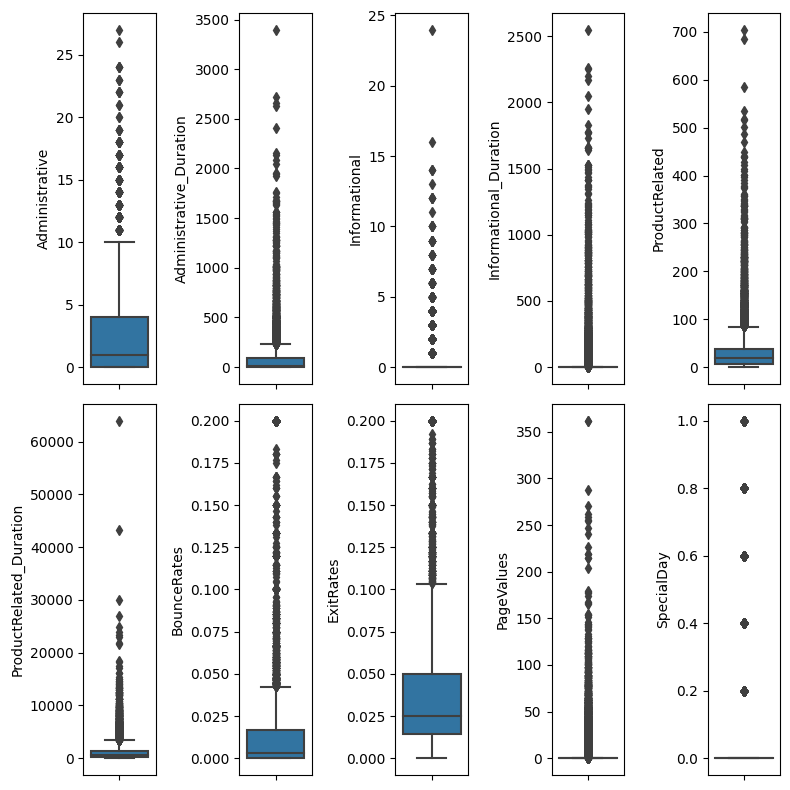

In [19]:
plt.figure(figsize=(8, 8))
for i in range(0,len(numerikal)):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=df[numerikal[i]],orient='v')
    plt.tight_layout()

hampir semua data numerik memiliki kasus outlier yang cukup ekstrim. Data outliers ini bisa kita hapus menggunakan teknik z-score atau IQR.

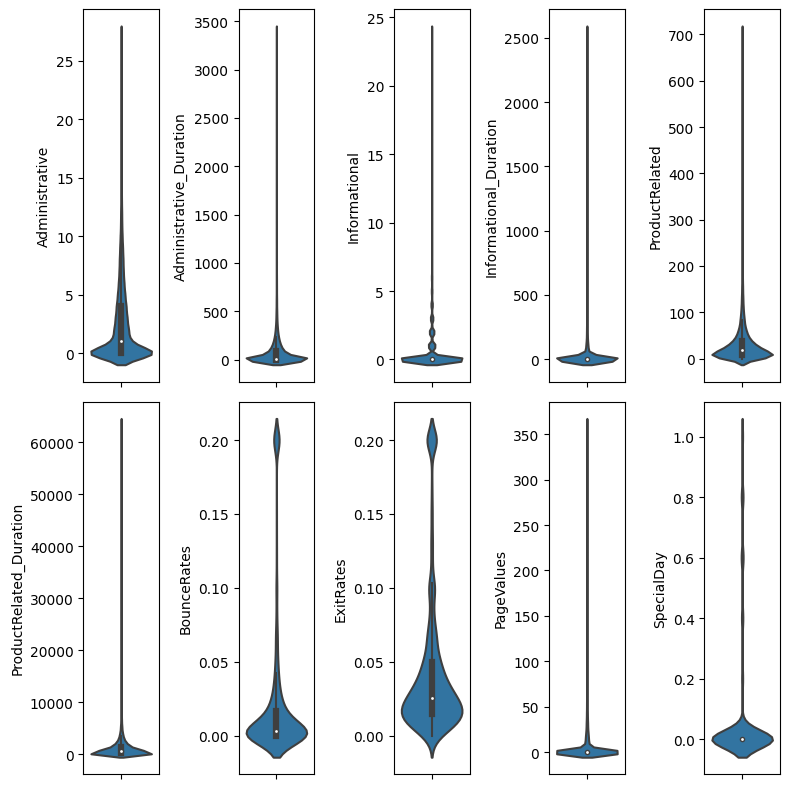

In [16]:
plt.figure(figsize=(8, 8))
for i in range(0,len(numerikal)):
    plt.subplot(2,5,i+1)
    sns.violinplot(y=df[numerikal[i]])
    plt.tight_layout()

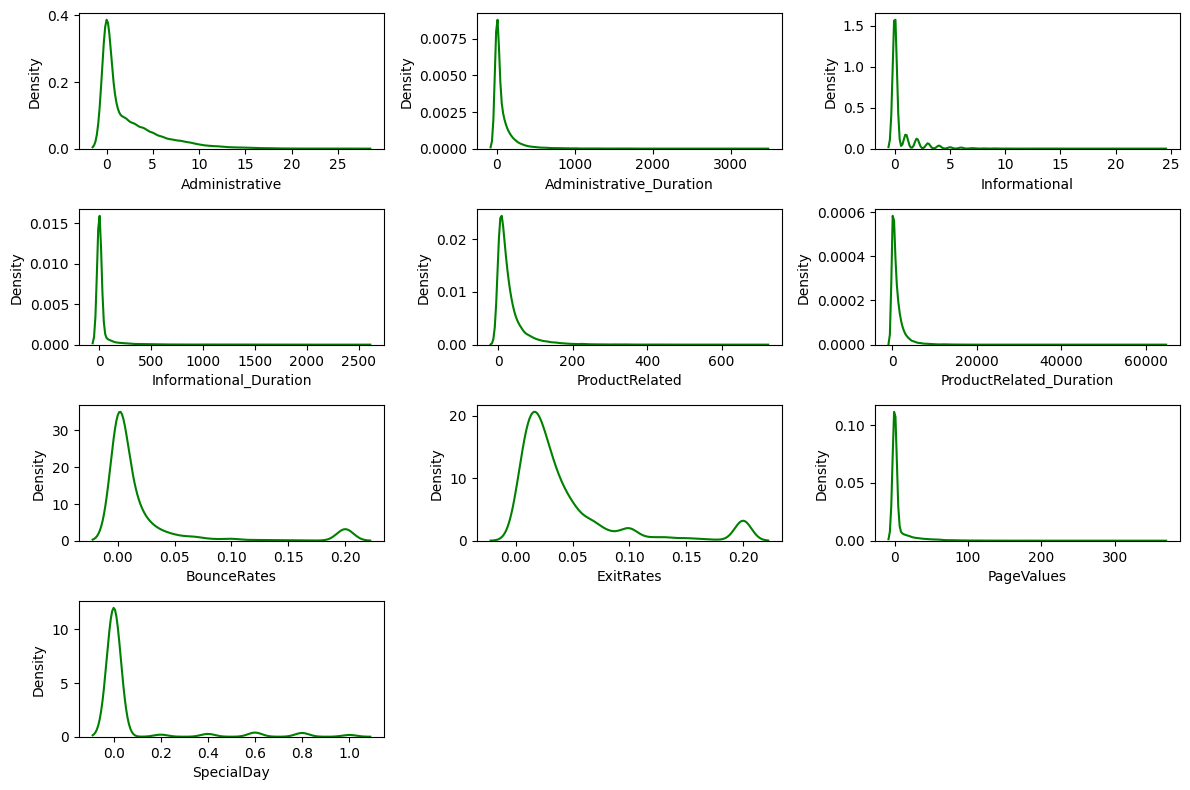

In [18]:
plt.figure(figsize=(12, 8))
for i in range(0,len(numerikal)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[numerikal[i]],color='green')
    plt.xlabel(numerikal[i])
    plt.tight_layout()

Semua data numerik memiliki nilai outlier yang tinggi di sebelah kanan. Hal ini membuat nilai mean menjadi tinggi sehingga menyebabkan grafik right-skewed. 

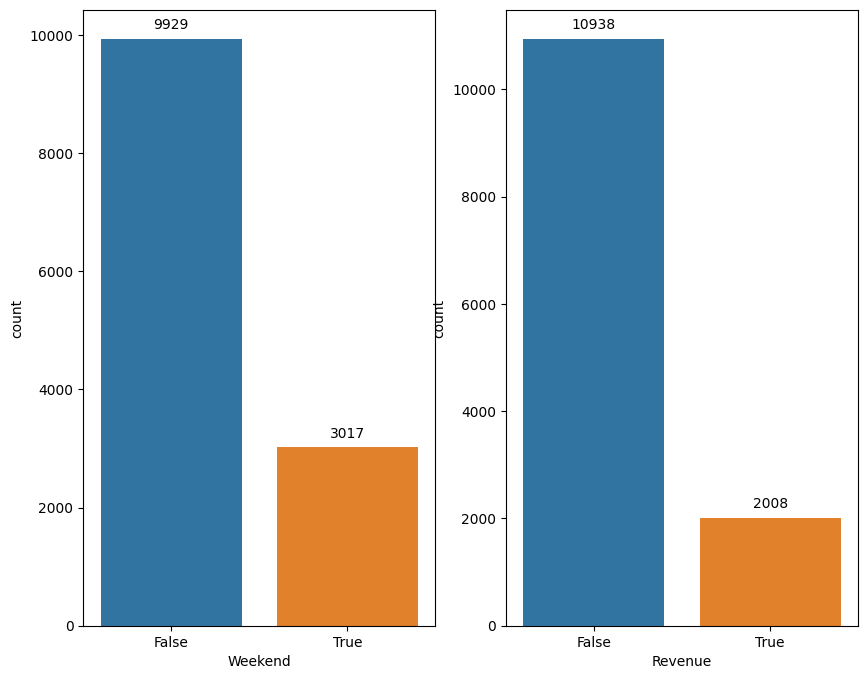

In [45]:
cat = ['Weekend', 'Revenue']

plt.figure(figsize=(10, 8))
for i in range(0,len(cat)):
    plt.subplot(1,len(cat),i+1)
    ax = sns.countplot(x=df[cat[i]].astype('object'))
    for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

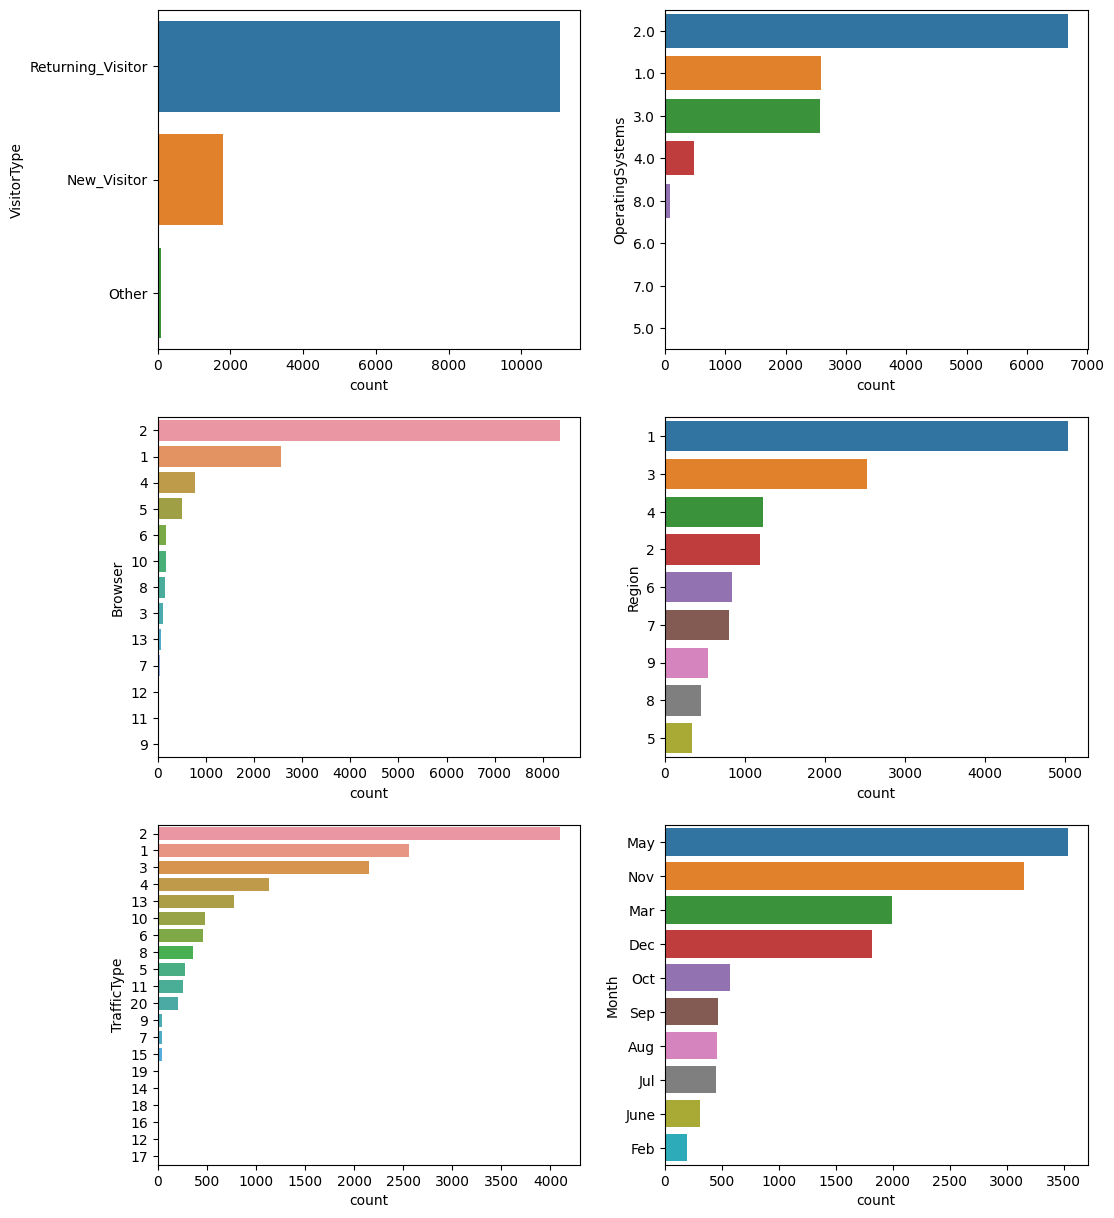

In [46]:
cat2 = ['VisitorType','OperatingSystems', 'Browser', 'Region', 'TrafficType','Month']

plt.figure(figsize=(12, 15))
for i in range(0,len(cat2)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cat2[i]].astype('object'),order = df[cat2[i]].astype('object').value_counts().index)

Untuk tipe kategorik, berikut adalah data dengan jumlah terbanyak :
- visitor type : returning visitor  
- Operating system : 2  
- browser : 2  
- region : 1  
- traffic type : 2  
- month : May
  
beberapa data memiliki count yang sangat kecil sehingga tidak muncul di graph seperti :  
- Operating system : 5,6,7 
- browser : 7,9,11,12,13  
- region : 1  
- traffic type : 12,14,15,16,17,18,19  
  
data ini memiliki potensi untuk didrop

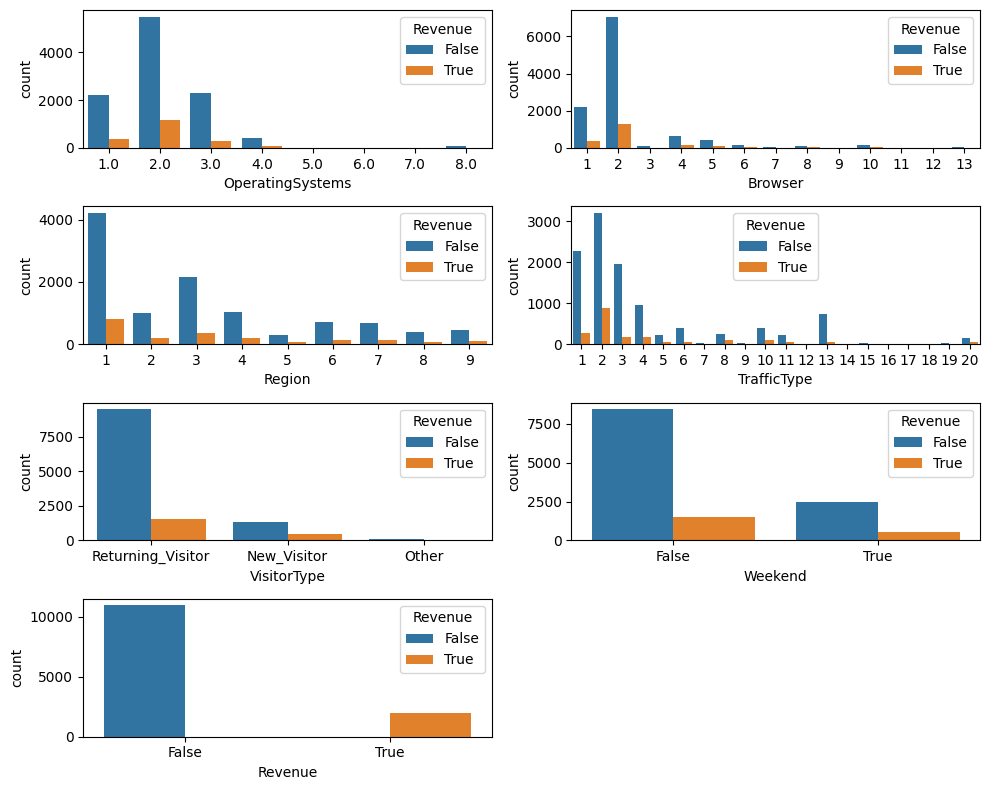

In [49]:
df_cat = df[kategori]
# df_cat = df_cat.astype('object')

plt.figure(figsize=(10, 8))

for i in range(0,len(kategori)):
    plt.subplot(4, 2, i+1) 
    sns.countplot(data=df_cat,x=kategori[i],hue='Revenue')
    plt.tight_layout()

# Multivarate Analysis

<AxesSubplot:>

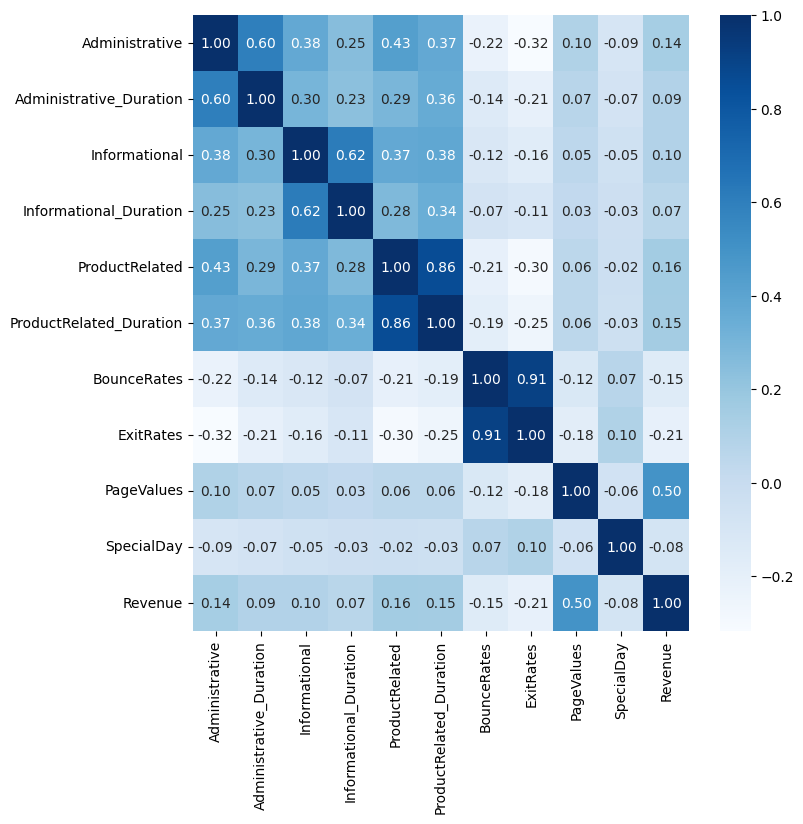

In [50]:
mult = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay','Revenue']

plt.figure(figsize=(8, 8))
sns.heatmap(df[mult].corr(),cmap='Blues',annot=True,fmt='.2f')

Dari correlation heatmap diatas, ada beberapa info yang bisa kita ambil :
- Ada dua relasi yang kuat, yaitu relasi productrelated - productrelated_duration sebesar 0.86 dan bouncerates - exitrares sebesar 0.91. 
- ada beberapa fitur independent yang memiliki relasi sangat rendah dengan fitur dependant, seperti administrative_duration ( 0.09), informational_duration (0.07), specialday(-0.08)
- Fitur PageValues memiliki nilai relasi tertinggi dengan fitur dependant (revenue), sehingga fitur ini harus dipertahankan.
  
Kita bisa men-drop salah satu fitur yang memiliki relasi yang kuat. Untuk mengetahui mana fitur yang didrop, bisa dilihat relasi fitur tersebut dengan fitur dependantnya (revenue).

<Figure size 1500x1500 with 0 Axes>

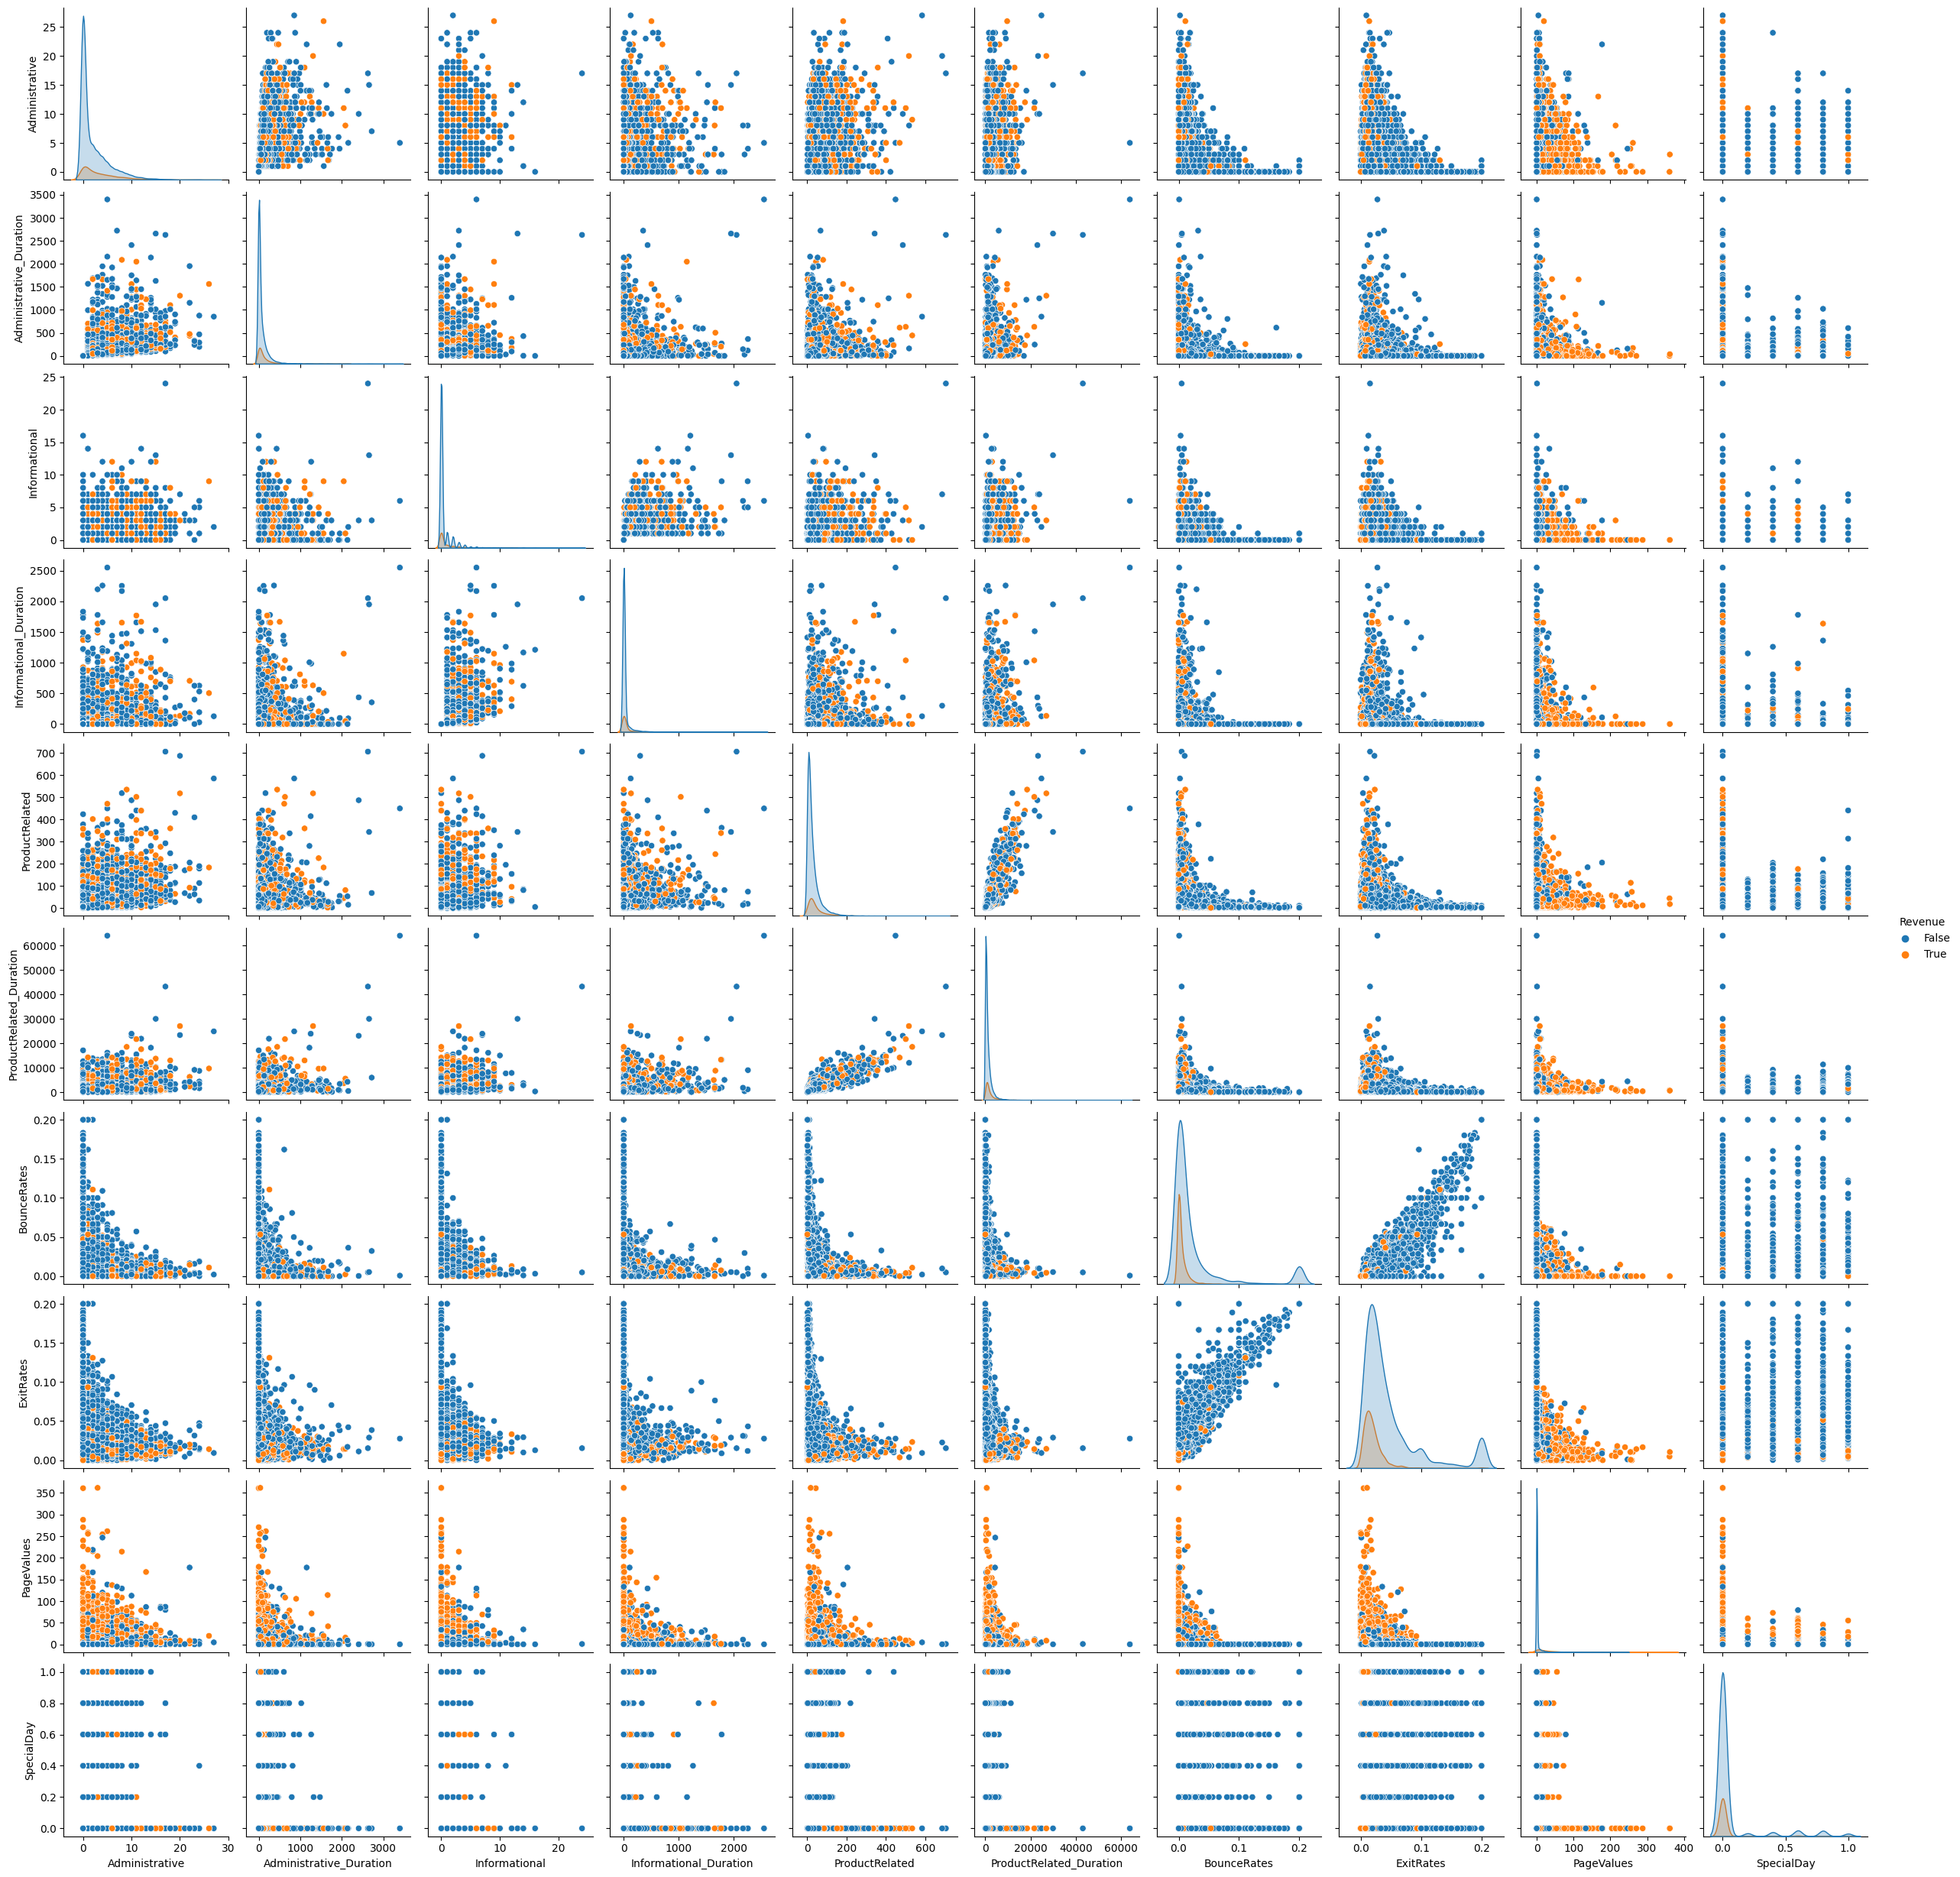

In [116]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[mult], diag_kind='kde',hue='Revenue')

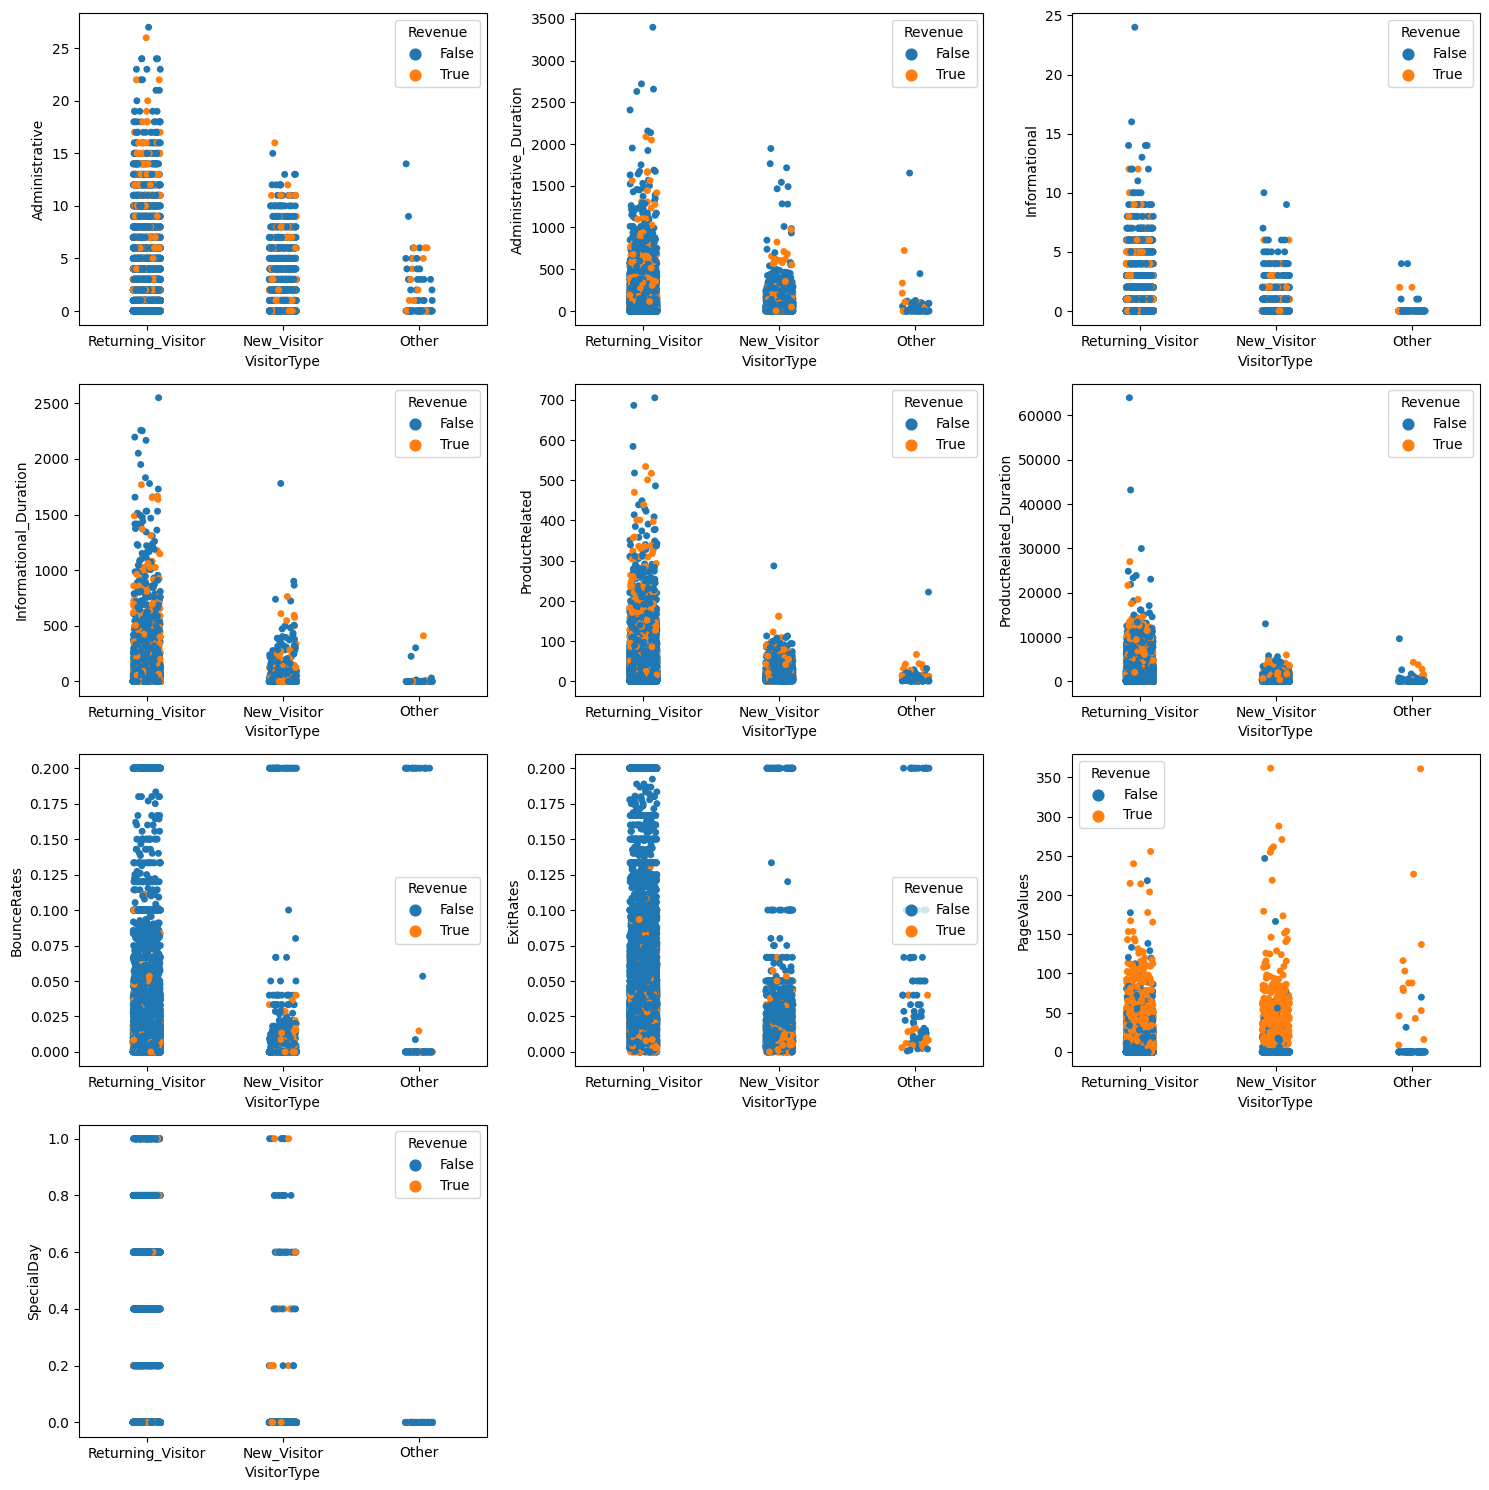

In [52]:
plt.figure(figsize=(15, 15))
for i in range(0, len(numerikal)): 
    plt.subplot(4, 3, i+1) 
    sns.stripplot(data=df, x='VisitorType', y=numerikal[i],hue='Revenue') 
    plt.tight_layout()

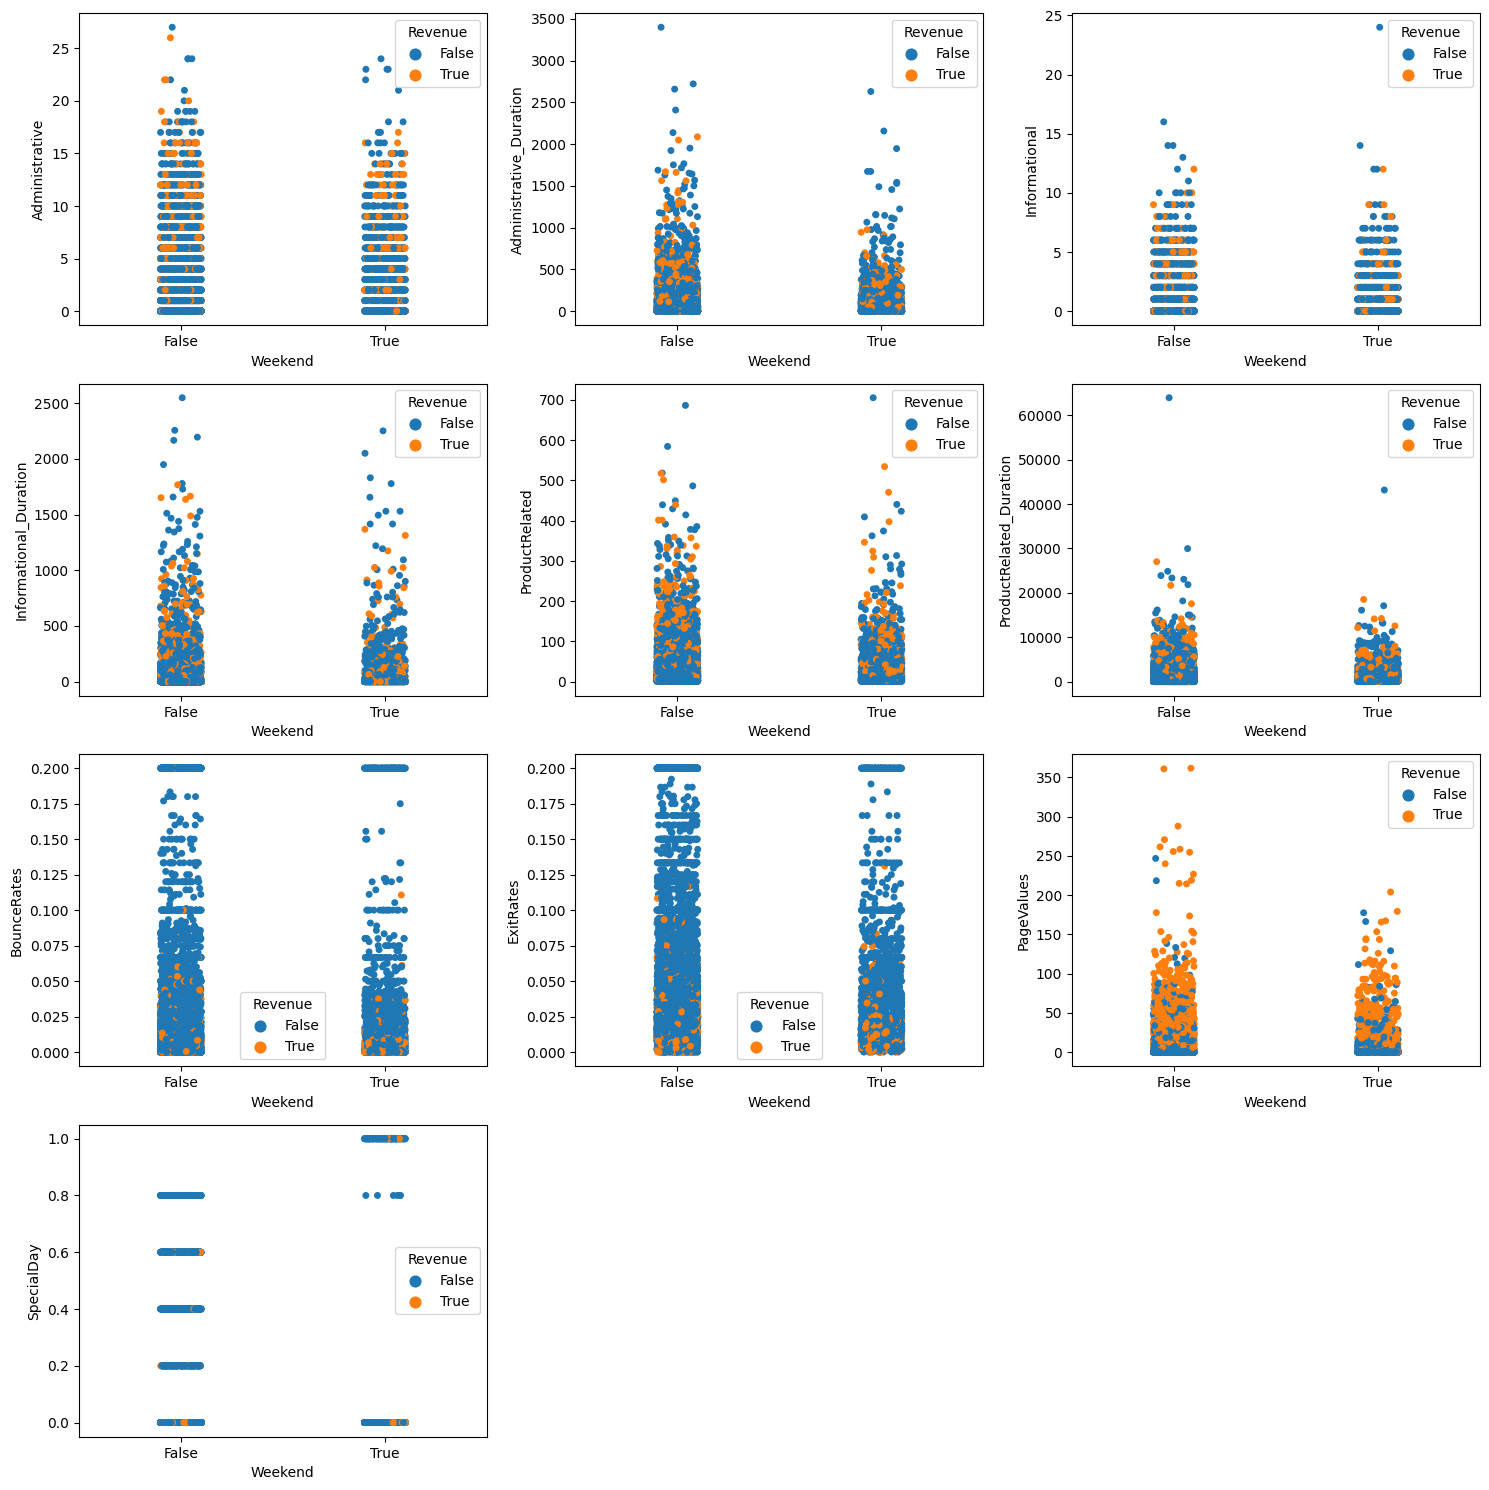

In [53]:
plt.figure(figsize=(15, 15))
for i in range(0, len(numerikal)): 
    plt.subplot(4, 3, i+1) 
    sns.stripplot(data=df, x='Weekend', y=numerikal[i],hue='Revenue') 
    plt.tight_layout()

Di weekdays, 

# Business Insight

In [98]:
conversion_rate_visitor = df.groupby('VisitorType')['Revenue'].mean().reset_index()

In [99]:
df['VisitorType'].value_counts()

Returning_Visitor    11072
New_Visitor           1785
Other                   89
Name: VisitorType, dtype: int64

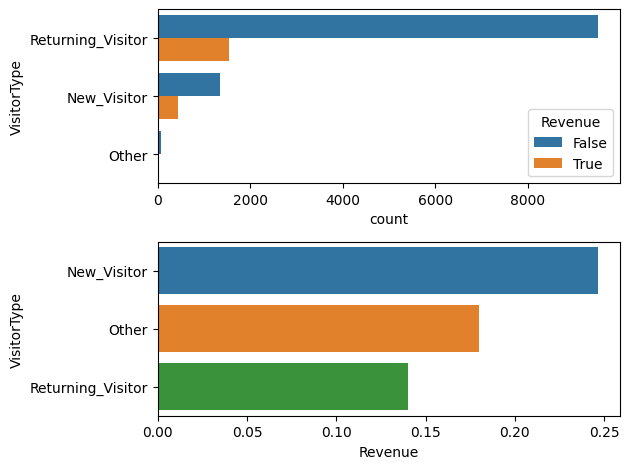

In [100]:
plt.subplot(2, 1, 1) 
sns.countplot(data=df_cat,y='VisitorType',hue='Revenue')

plt.subplot(2,1,2)
sns.barplot(data=conversion_rate_visitor, y='VisitorType',x='Revenue')
plt.tight_layout()

Nilai conversion rate tertinggi (24,64%) berasal dari new visitor padahal kunjungan tertinggi (11.072 kunjungan) berasal dari returning visitor. Hal ini menunjukkan bahwa lebih banyak new visitor yang melakukan pembelian daripada returning visitor.  
  
Business Recommendation:   
Perusahaan perlu mempelajari hal-hal atau strategi apa saja yang sudah efektif dalam menarik pelanggan baru sebelumnya agar bisa ditingkatkan lagi. Selain itu, perlu dilakukan analisa data perilaku returning visitor untuk mengetahui lebih jauh alasan mereka melakukan pembelian atau tidak. Perusahaan juga bisa menawarkan promo-promo untuk pembeli yang melakukan repeat order atau program loyalty agar bisa meningkatkan minat pembelian pada returning visitor.


In [101]:
conversion_rate_weekend = df.groupby('Weekend')['Revenue'].mean().reset_index()

In [102]:
df['Weekend'].value_counts()

False    9929
True     3017
Name: Weekend, dtype: int64

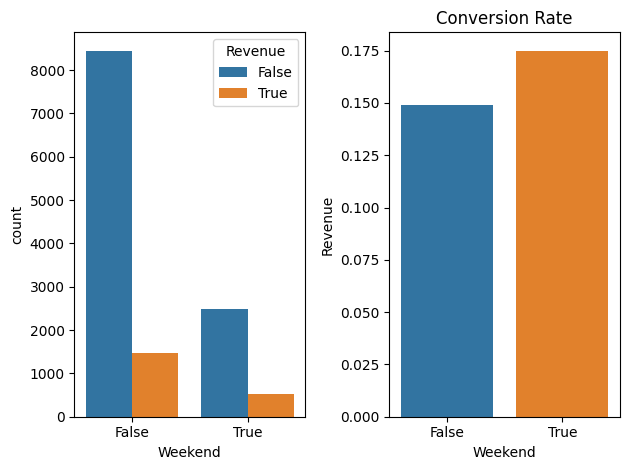

In [103]:
plt.subplot(1, 2, 1) 
sns.countplot(data=df_cat,x='Weekend',hue='Revenue')

plt.subplot(1,2,2)
sns.barplot(data=conversion_rate_weekend, x='Weekend',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

In [104]:
conversion_rate_month = df.groupby('Month')['Revenue'].mean().reset_index()

In [105]:
df['Month'].value_counts()

May     3533
Nov     3151
Mar     1997
Dec     1816
Oct      574
Sep      464
Aug      461
Jul      451
June     308
Feb      191
Name: Month, dtype: int64

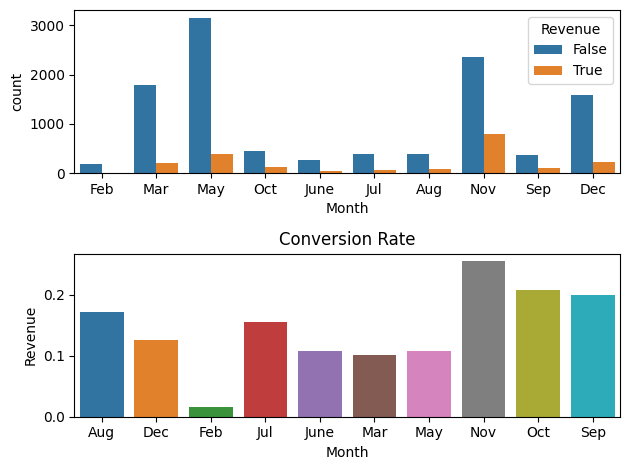

In [106]:
plt.subplot(2, 1, 1) 
sns.countplot(data=df,x='Month',hue='Revenue')

plt.subplot(2,1,2)
sns.barplot(data=conversion_rate_month, x='Month',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

In [107]:
conversion_rate_os = df.groupby('OperatingSystems')['Revenue'].mean().reset_index()

In [108]:
df['OperatingSystems'].value_counts()

2.0    6673
1.0    2590
3.0    2571
4.0     480
8.0      78
6.0      17
7.0       7
5.0       6
Name: OperatingSystems, dtype: int64

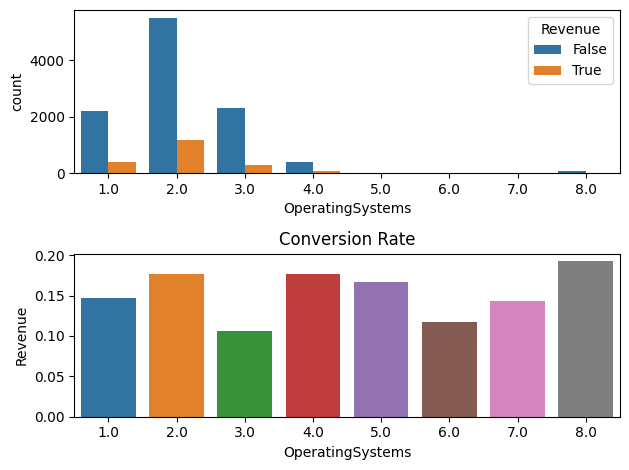

In [109]:
plt.subplot(2, 1, 1) 
sns.countplot(data=df_cat,x='OperatingSystems',hue='Revenue')

plt.subplot(2,1,2)
sns.barplot(data=conversion_rate_os, x='OperatingSystems',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

In [110]:
conversion_rate_browser = df.groupby('Browser')['Revenue'].mean().reset_index()

In [111]:
df['Browser'].value_counts()

2     8360
1     2570
4      780
5      496
6      180
10     172
8      143
3      114
13      65
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

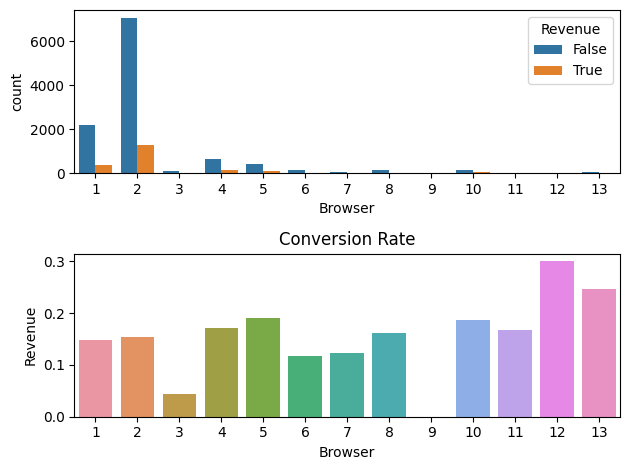

In [112]:
plt.subplot(2, 1, 1) 
sns.countplot(data=df_cat,x='Browser',hue='Revenue')

plt.subplot(2,1,2)
sns.barplot(data=conversion_rate_browser, x='Browser',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

In [114]:
conversion_rate_region = df.groupby('Region')['Revenue'].mean().reset_index()

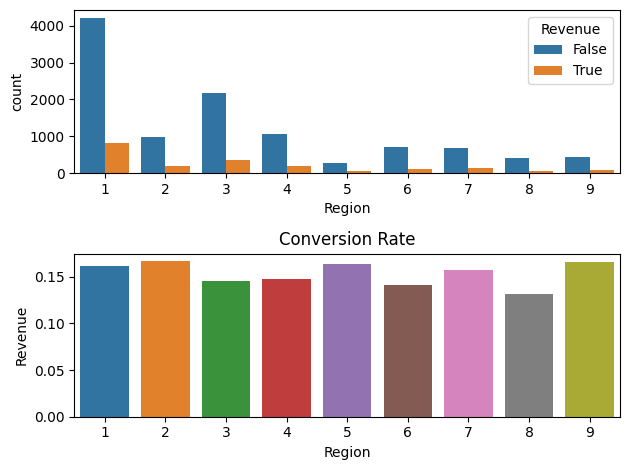

In [115]:
plt.subplot(2, 1, 1) 
sns.countplot(data=df_cat,x='Region',hue='Revenue')

plt.subplot(2,1,2)
sns.barplot(data=conversion_rate_region, x='Region',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

Berdasarkan Grafik diatas diketahui bahwa mayoritas dari penggunjung berasal dari 3 kota besar yaitu kota 1, 3, 4. Sehingga, untuk meningkatkan nilai conversion rate, kita dapat memprioritaskan untuk melakukan promosi di kota-kota tersebut.

<AxesSubplot:xlabel='Month', ylabel='count'>

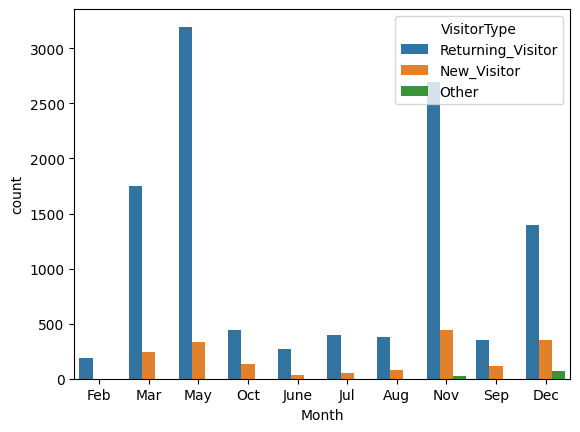

In [113]:
sns.countplot(data=df,x='Month',hue='VisitorType')